## Breast Cancer Data Analysis
### Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset. 

### Import Data manipulation and visualization libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset 

In [2]:
data = pd.read_csv('breast-cancer.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Exploration and Cleaning 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
# Mapping 'M' to 1 (Malignant) and 'B' to 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

### Exploratory data analysis (EDA) 

In [17]:
def boxplot(cols,len1):
    plt.figure(1 , figsize = (25,5))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,len1,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Boxplot of {0}'.format(i))
        sns.boxplot(data[i])
    plt.show()

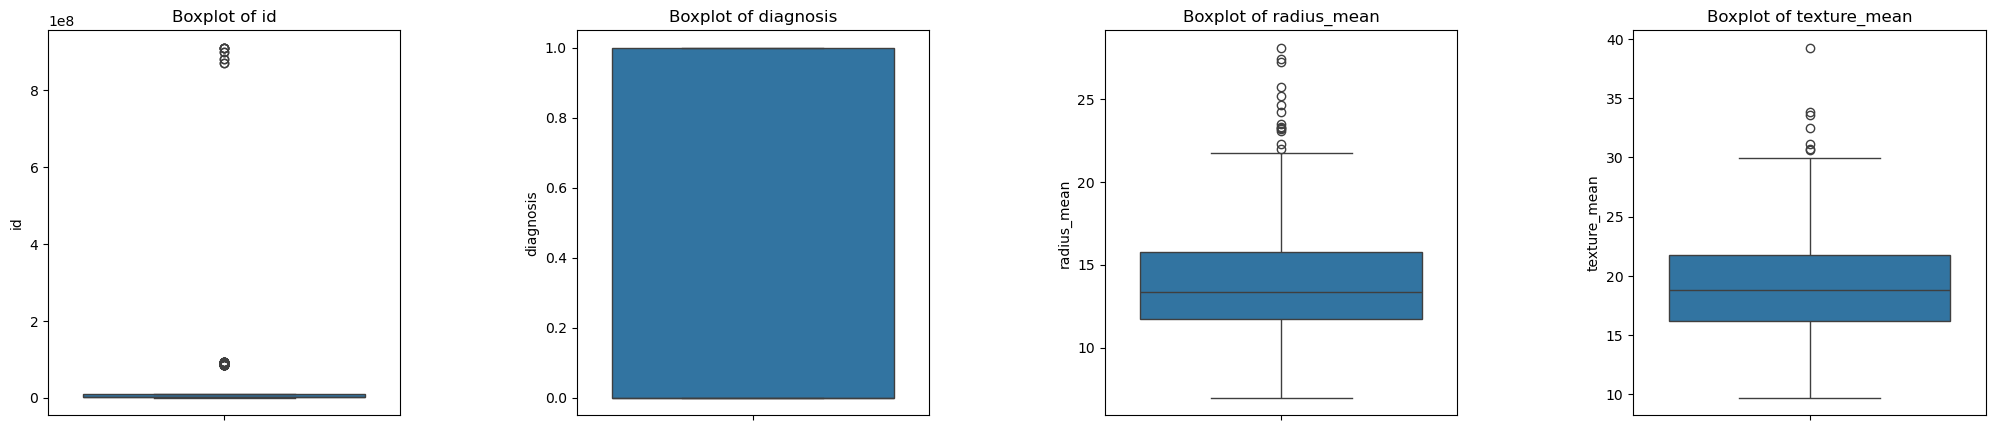

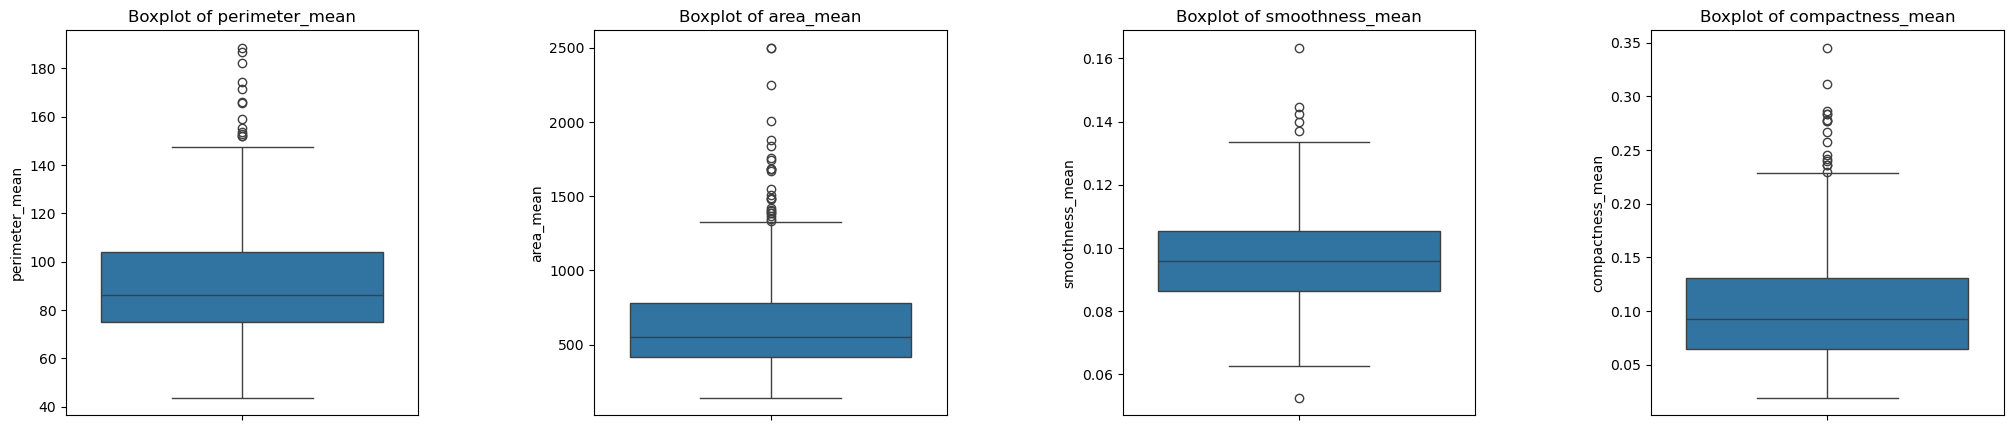

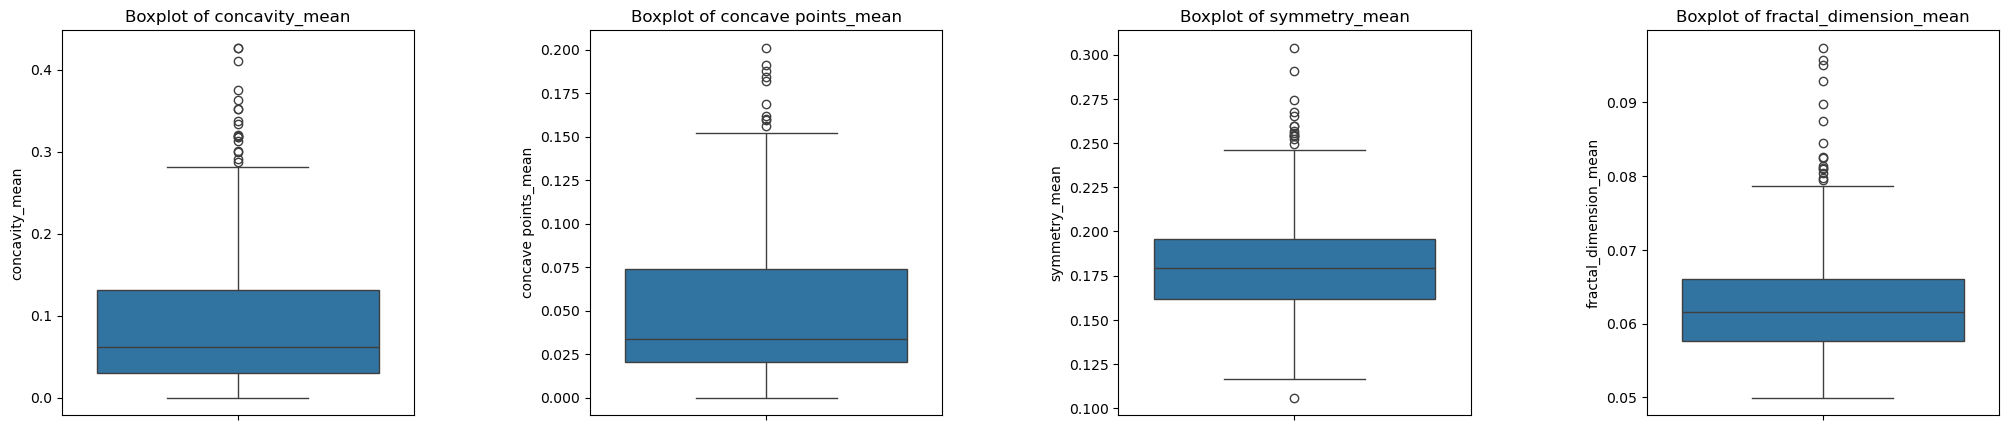

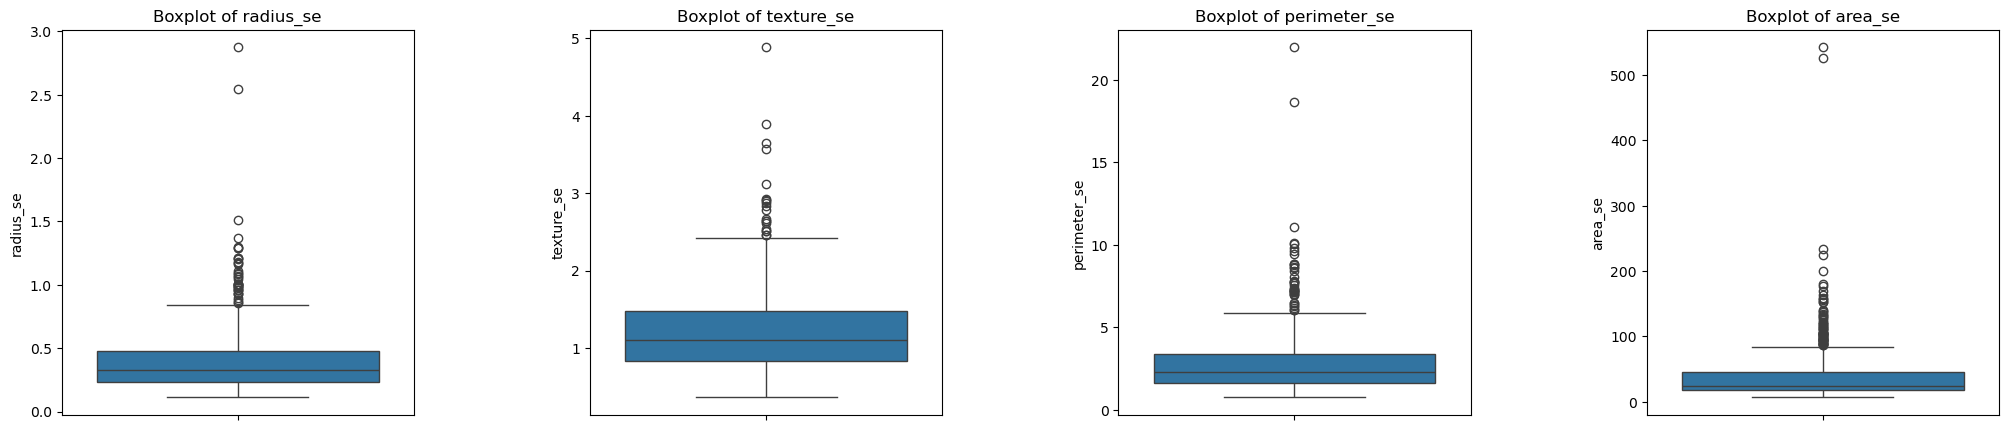

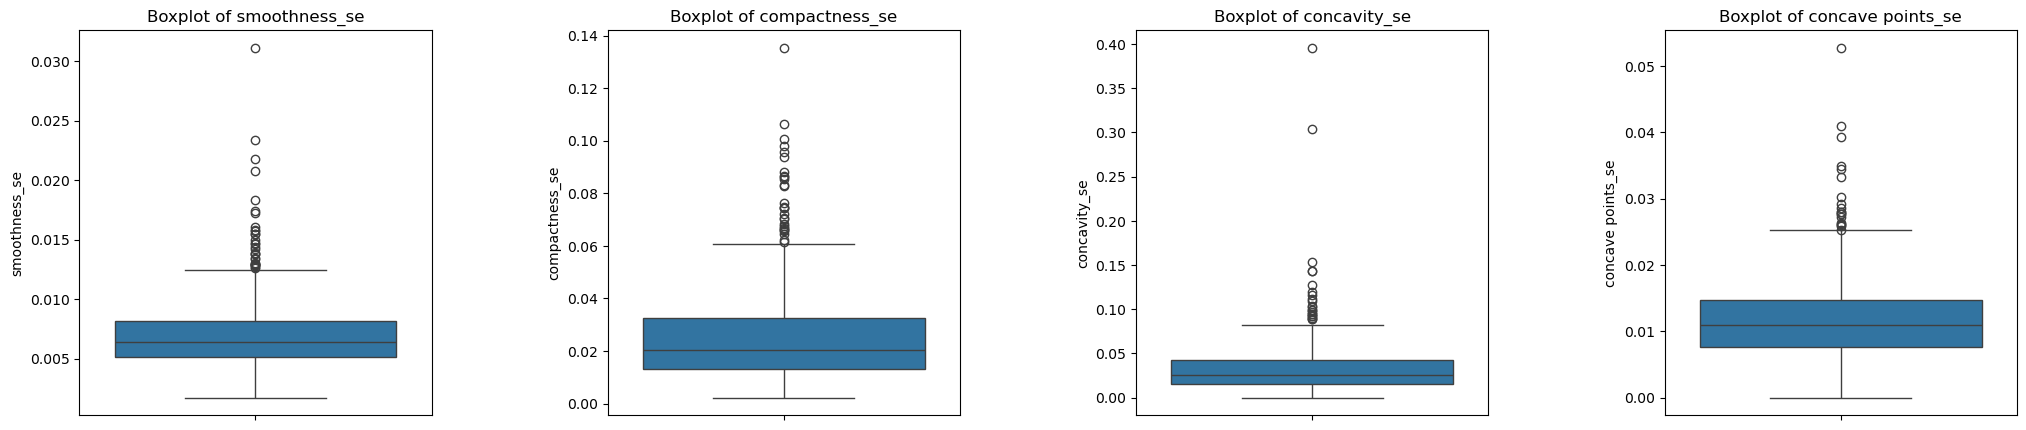

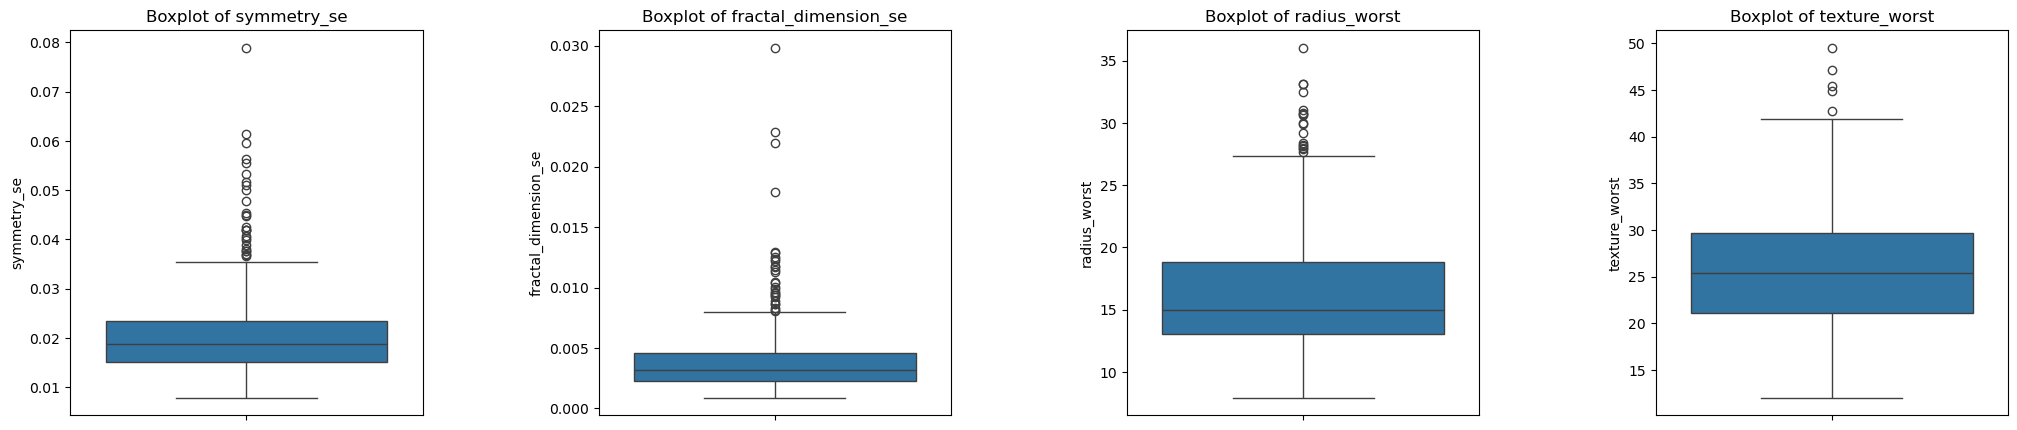

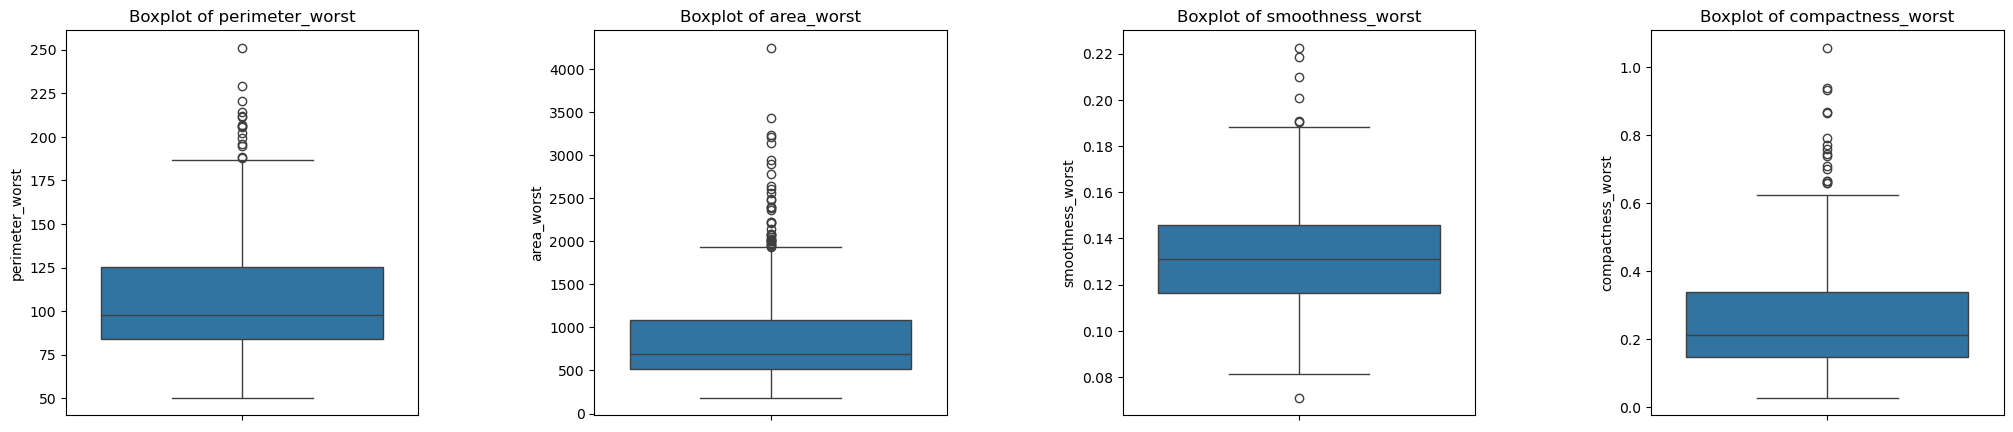

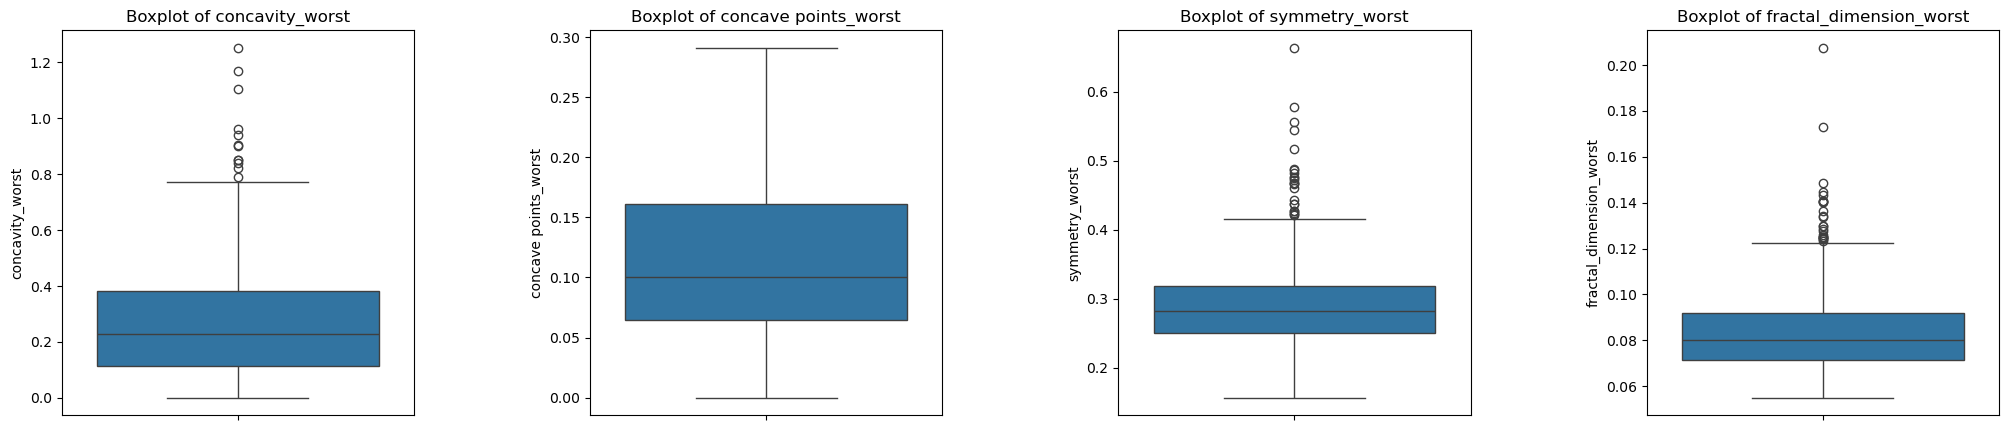

In [22]:
length = 4
boxplot(['id', 'diagnosis', 'radius_mean', 'texture_mean'],length)
boxplot(['perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean'],length)
boxplot(['concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean'],length)
boxplot(['radius_se', 'texture_se', 'perimeter_se', 'area_se'],length)
boxplot(['smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se'],length)
boxplot(['symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst'],length)
boxplot(['perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst'],length)
boxplot(['concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],length)


In [25]:
def distplot(cols,len1):
    plt.figure(2 , figsize = (25,5))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,len1,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Distplot of {0}'.format(i))
        sns.distplot(data[i],bins=10)
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

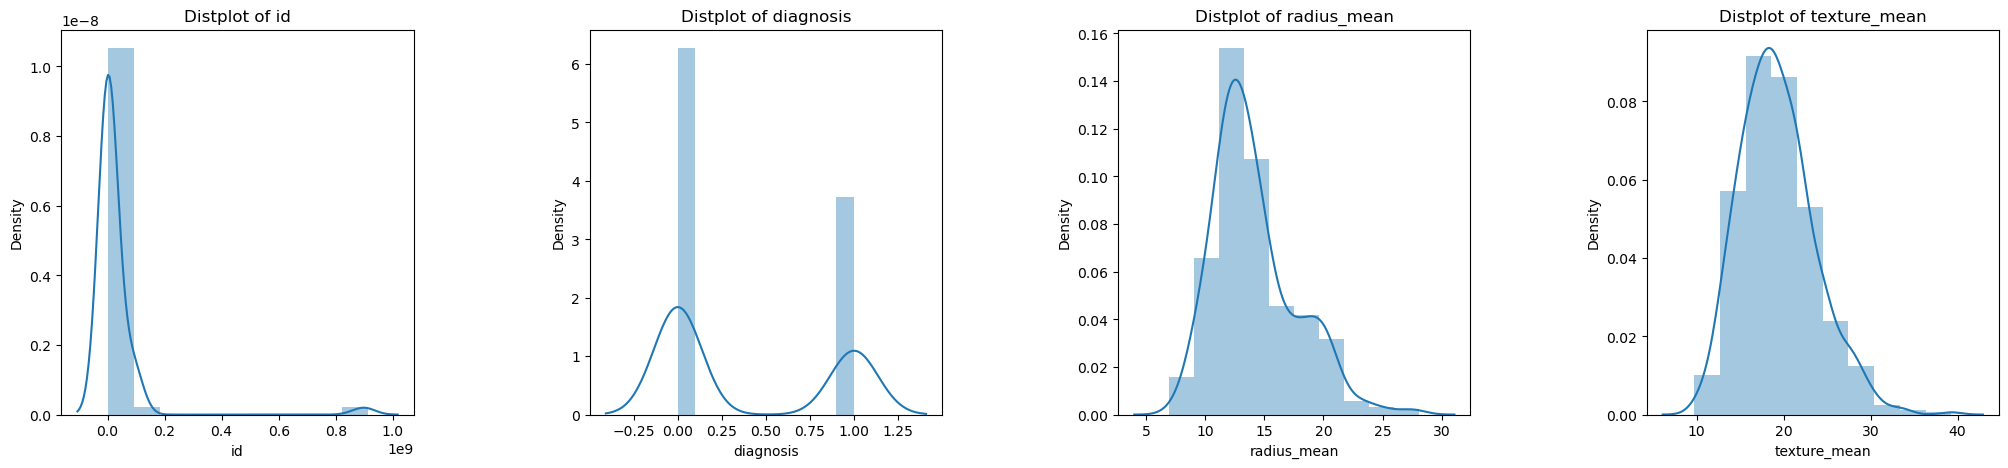

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

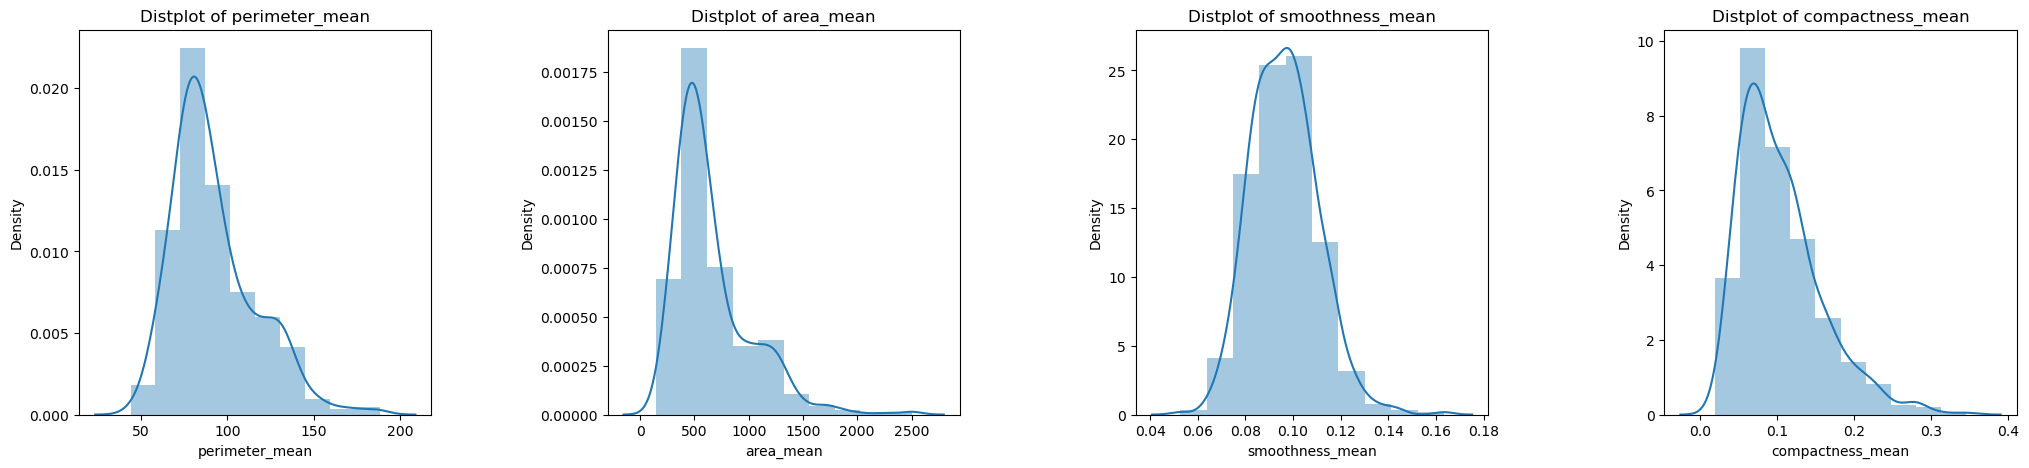

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

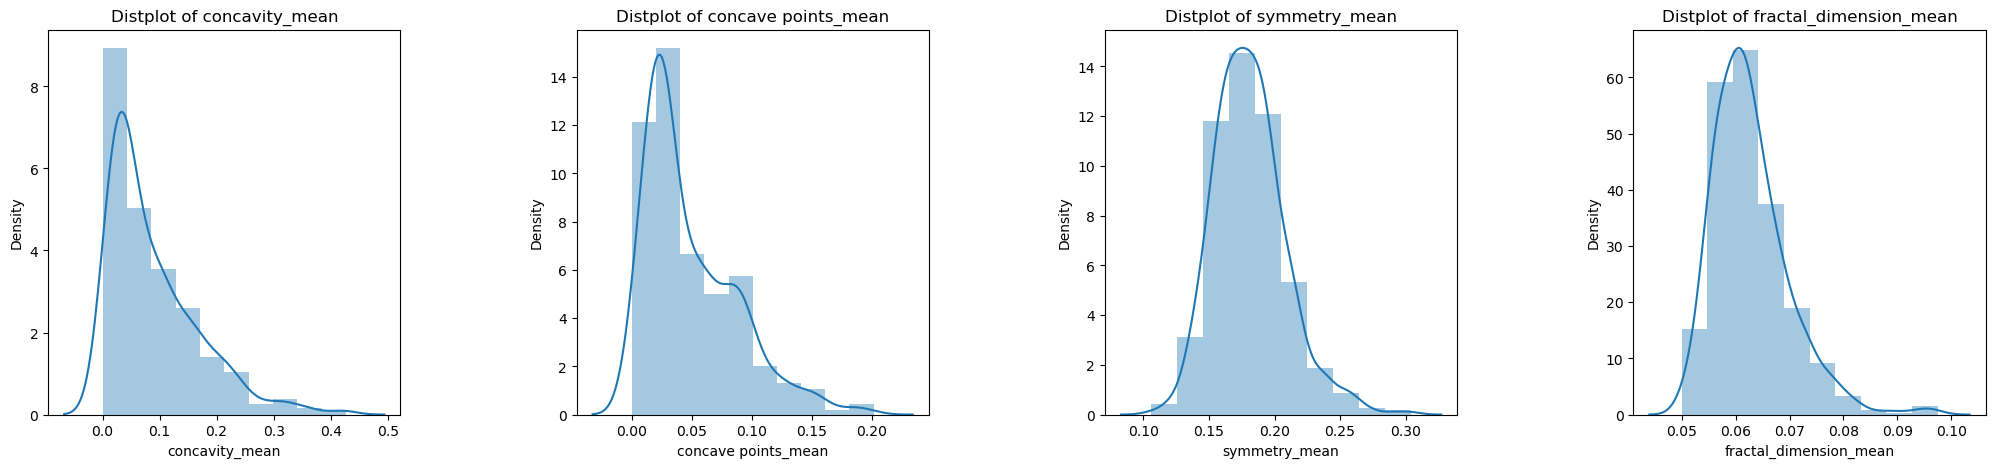

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

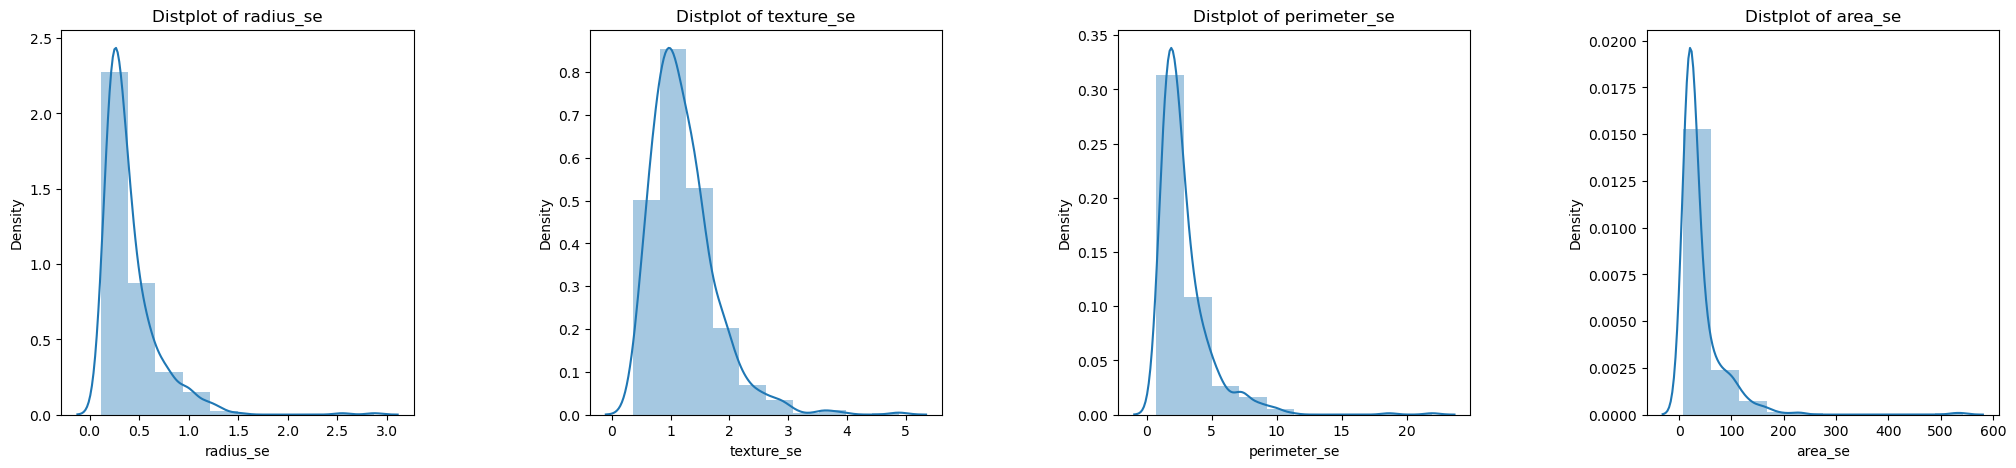

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

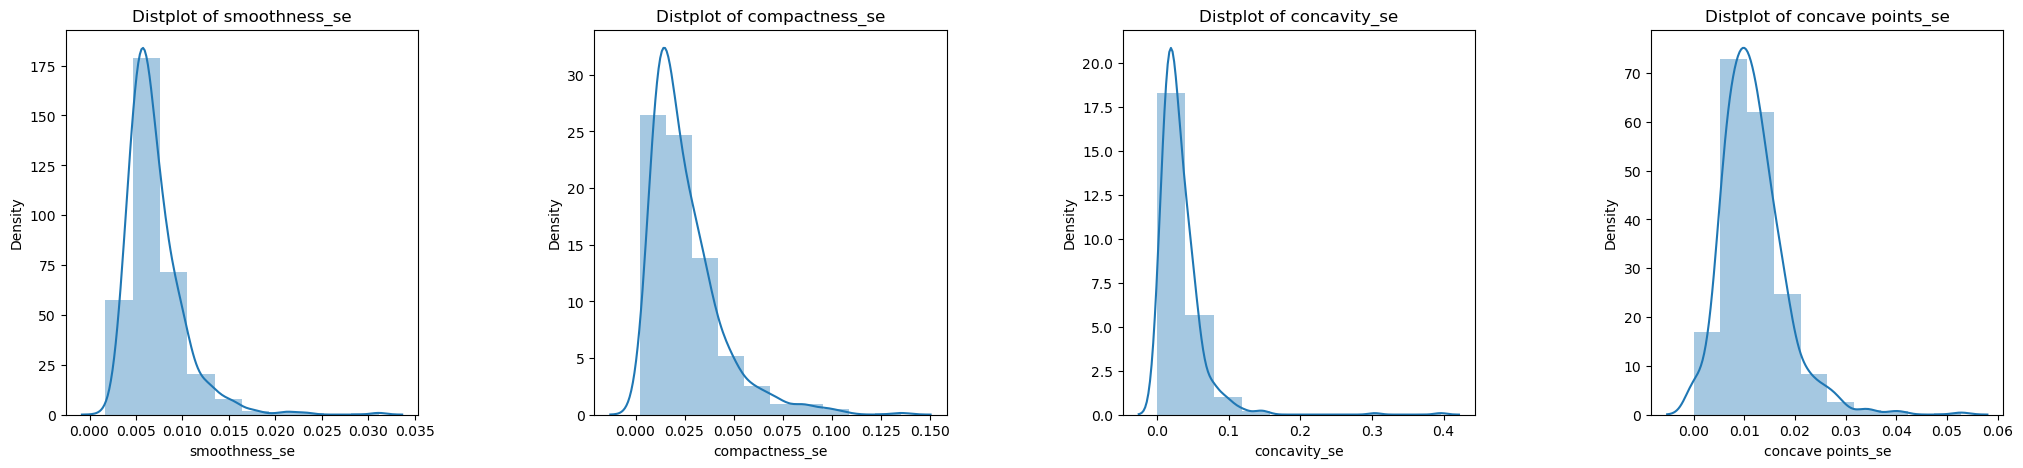

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

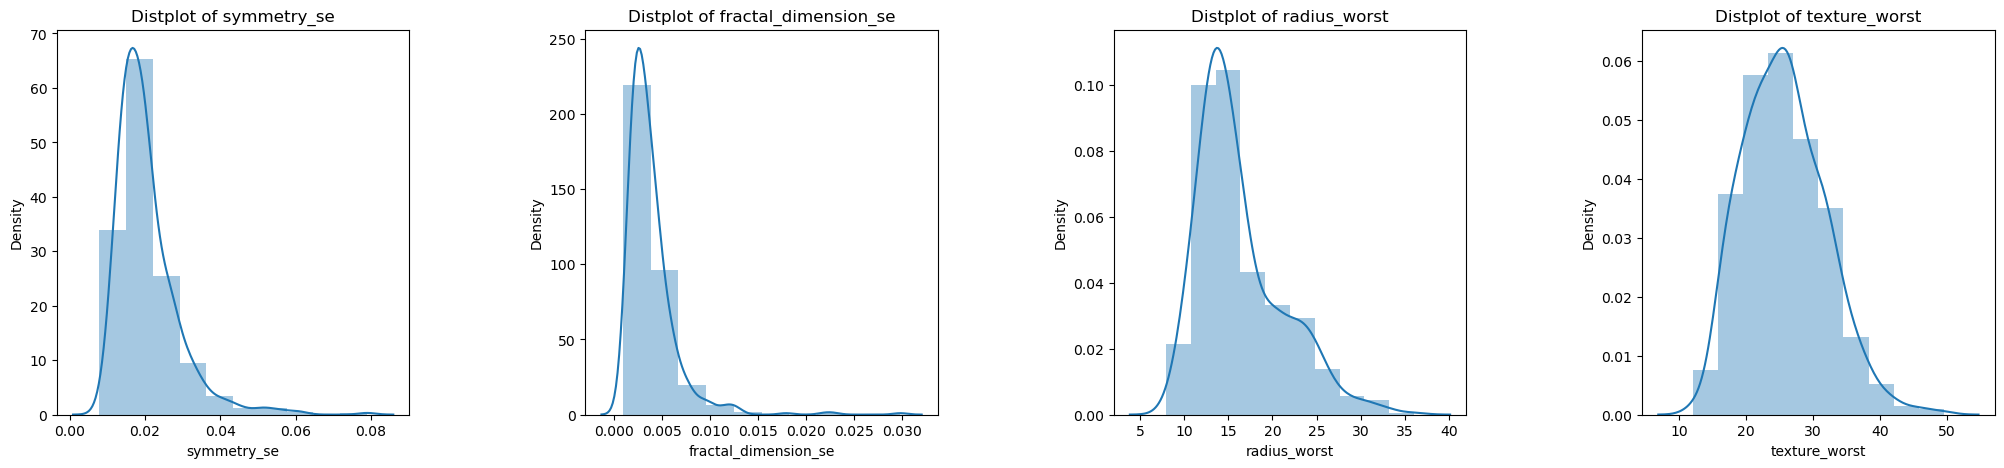

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

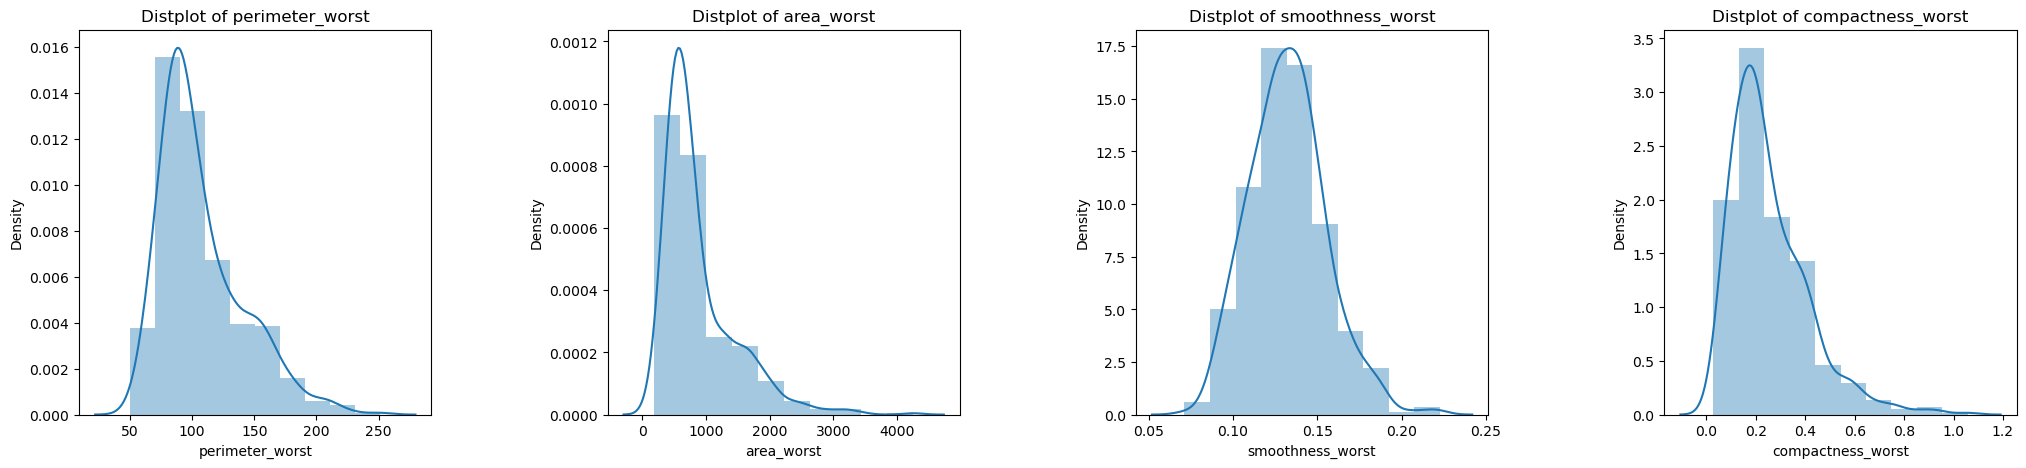

C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5440\781394793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel

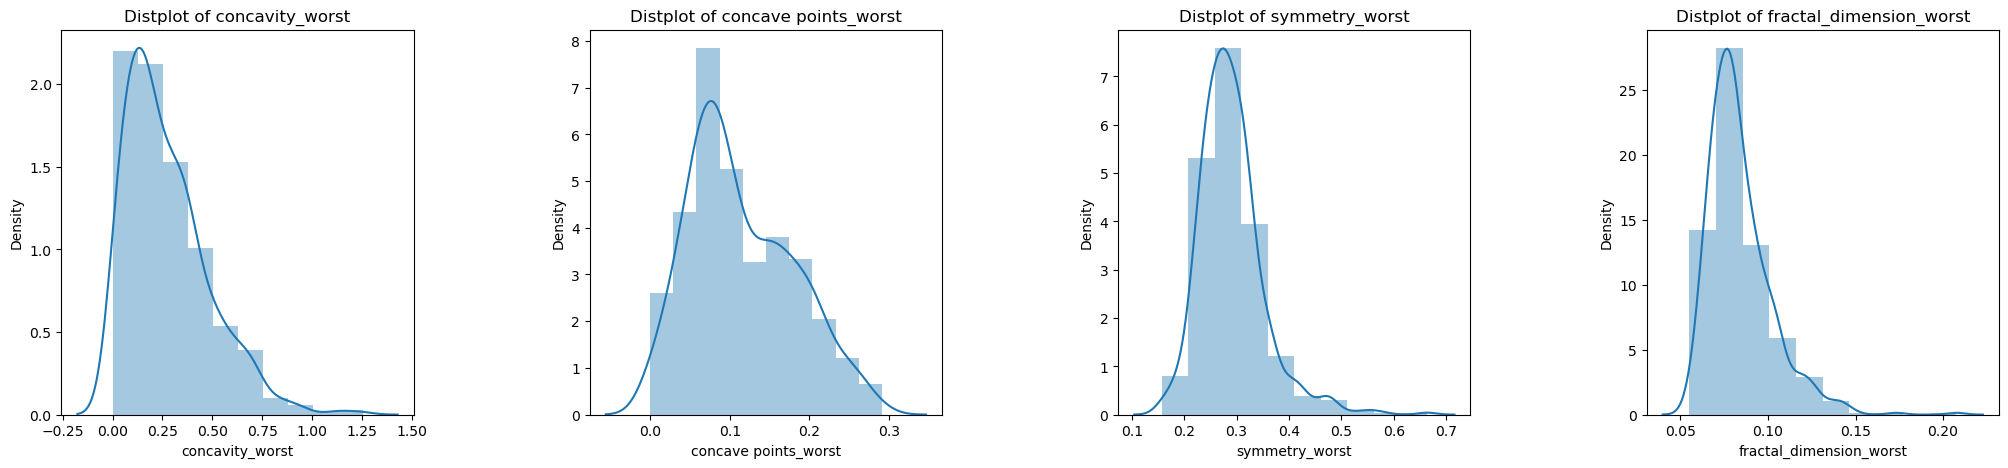

In [26]:
length = 4
distplot(['id', 'diagnosis', 'radius_mean', 'texture_mean'],length)
distplot(['perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean'],length)
distplot(['concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean'],length)
distplot(['radius_se', 'texture_se', 'perimeter_se', 'area_se'],length)
distplot(['smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se'],length)
distplot(['symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst'],length)
distplot(['perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst'],length)
distplot(['concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],length)

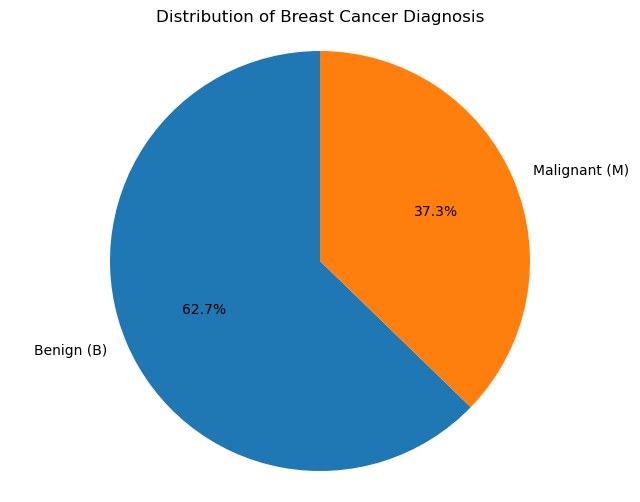

In [33]:
# Group by diagnosis and count occurrences
diagnosis_counts = data.groupby('diagnosis')['diagnosis'].count()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (B)', 'Malignant (M)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

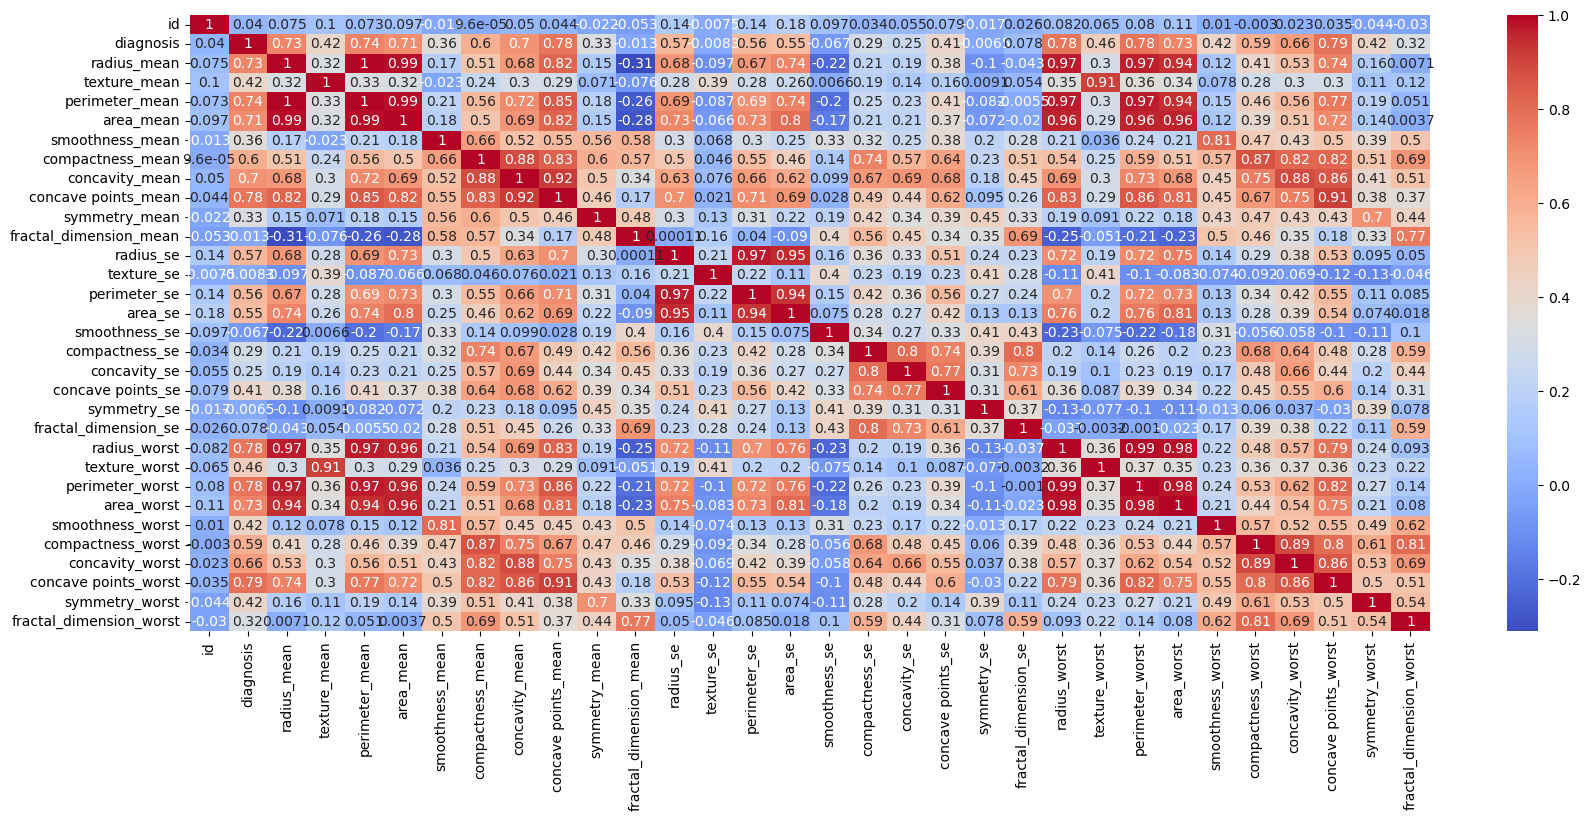

In [34]:
corr = data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Import Machine learning models 

In [35]:
# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Feature and target separation

In [36]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

###  Splitting the dataset into training and testing sets (80% train, 20% test)

In [40]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Support Vector Machine (SVM) 

In [92]:
# Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc

SVC(kernel='linear', random_state=42)

In [93]:
svc.fit(X_train_scaled, y_train)

# Predictions
y_pred_svc = svc.predict(X_test_scaled)

SVM Accuracy:  0.956140350877193
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

---------------------------------------------------------


Text(95.72222222222221, 0.5, 'Truth')

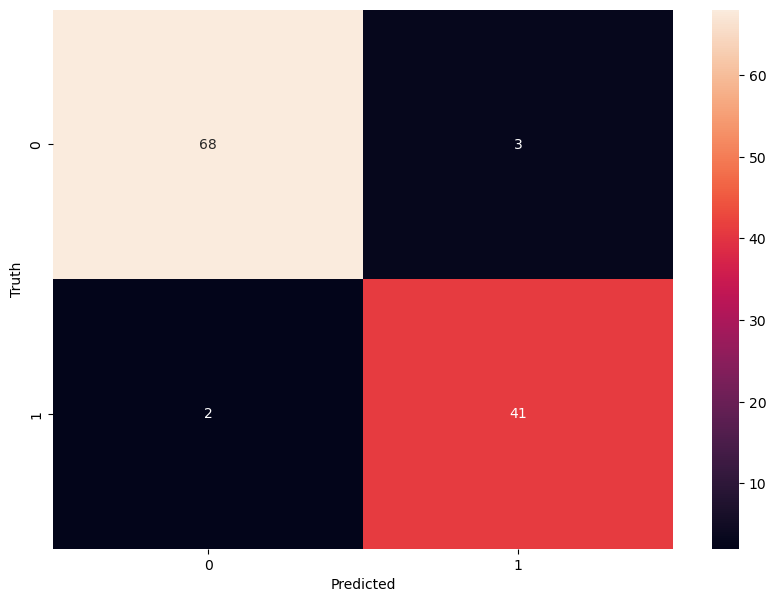

In [94]:
# Evaluate the model
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svc))
print("---------------------------------------------------------")
print(classification_report(y_test, y_pred_svc))
print("---------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 2. Logistic Regression 

In [95]:
logreg = LogisticRegression(random_state=42)
logreg

LogisticRegression(random_state=42)

In [96]:
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

Logistic Regression Accuracy:  0.9736842105263158
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

---------------------------------------------------------


Text(95.72222222222221, 0.5, 'Truth')

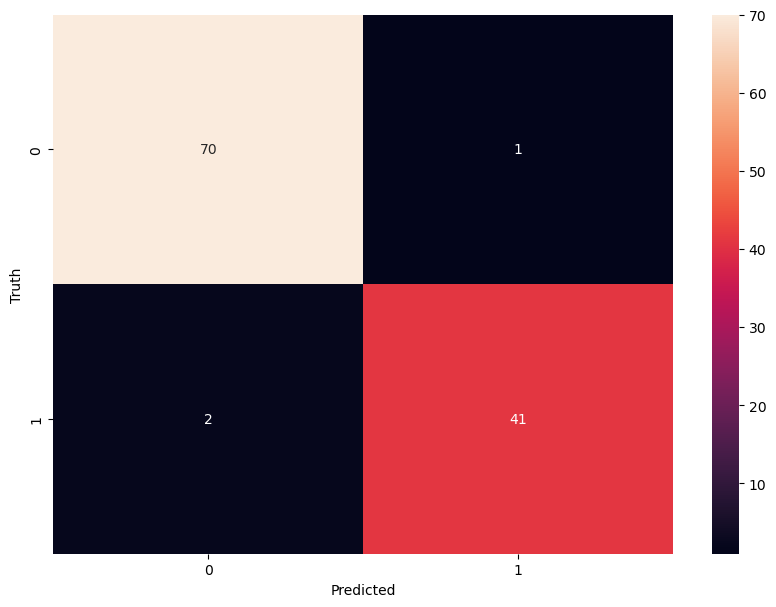

In [97]:
# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("---------------------------------------------------------")
print(classification_report(y_test, y_pred_logreg))
print("---------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 3. Decision Tree 

In [111]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree

DecisionTreeClassifier(random_state=42)

In [112]:
dtree.fit(X_train_scaled, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test_scaled)

Decision Tree Accuracy:  0.9385964912280702
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

---------------------------------------------------------


Text(95.72222222222221, 0.5, 'Truth')

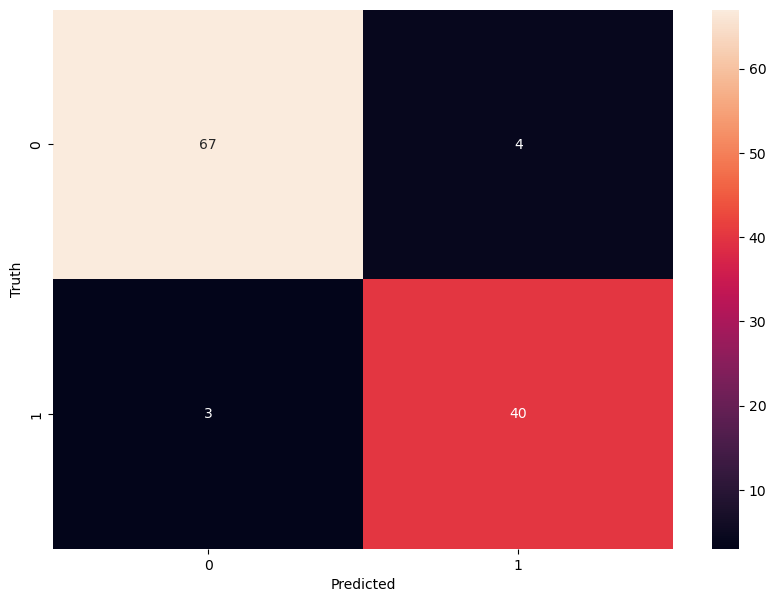

In [113]:
# Evaluate the model
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dtree))
print("---------------------------------------------------------")
print(classification_report(y_test, y_pred_dtree))
print("---------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 4. Random Forest 

In [114]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf

RandomForestClassifier(random_state=42)

In [115]:
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

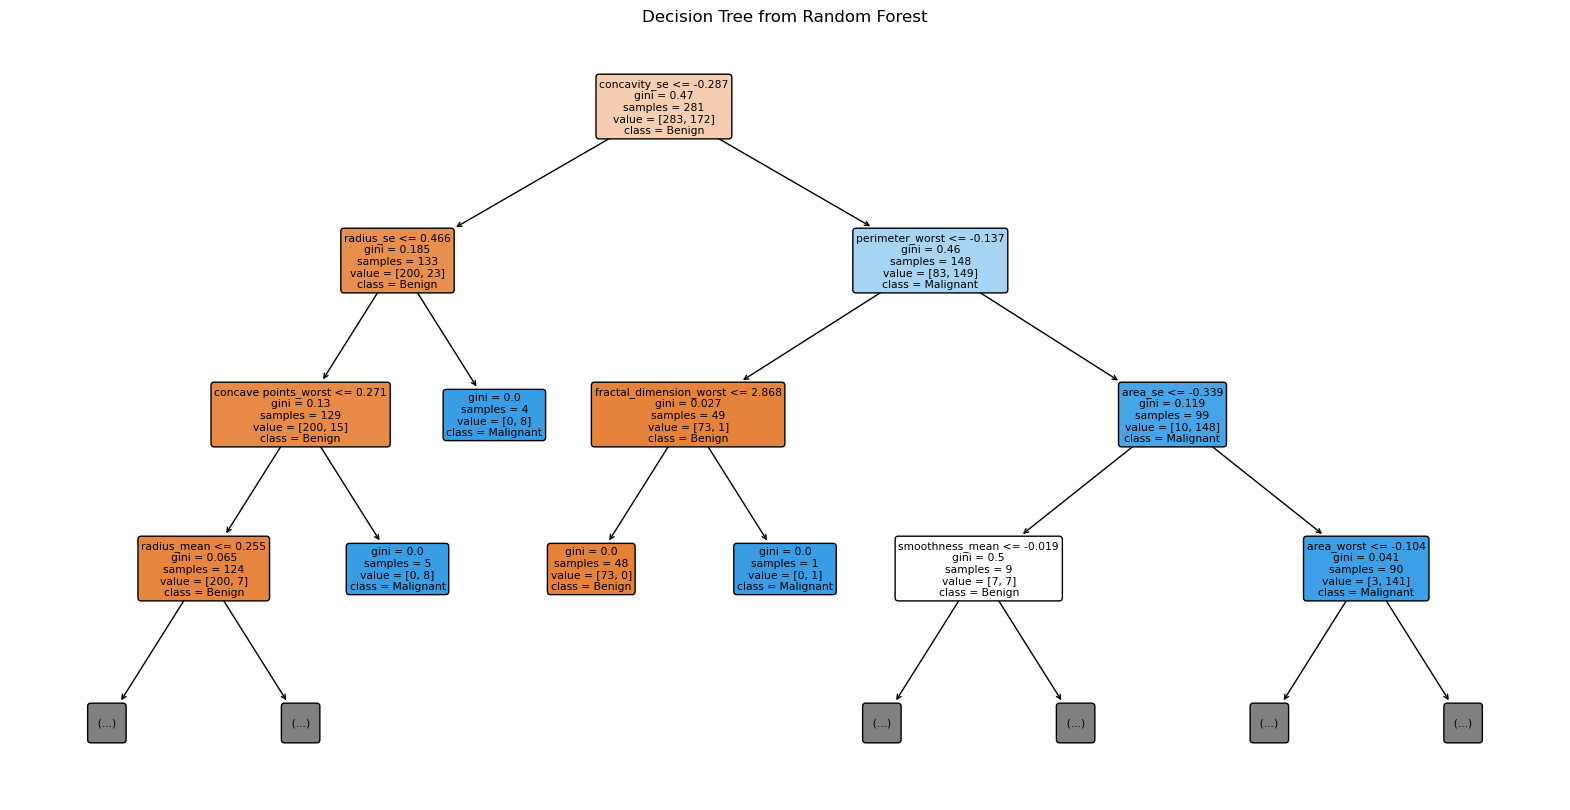

In [116]:
from sklearn.tree import plot_tree
tree = rf.estimators_[0]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, class_names=['Benign', 'Malignant'], max_depth=3)
plt.title('Decision Tree from Random Forest')
plt.show()

Random Forest Accuracy:  0.9649122807017544
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

---------------------------------------------------------


Text(95.72222222222221, 0.5, 'Truth')

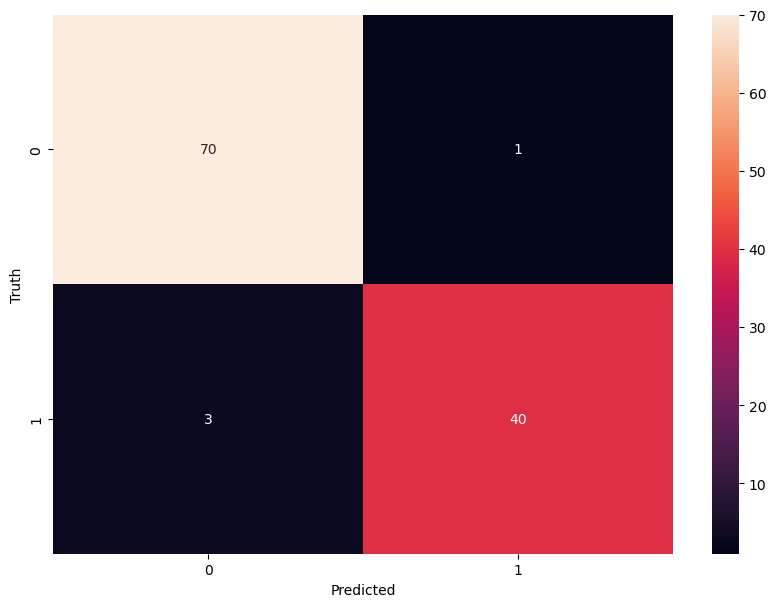

In [117]:
# Evaluate the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("---------------------------------------------------------")
print(classification_report(y_test, y_pred_rf))
print("---------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Compare Model Performance 

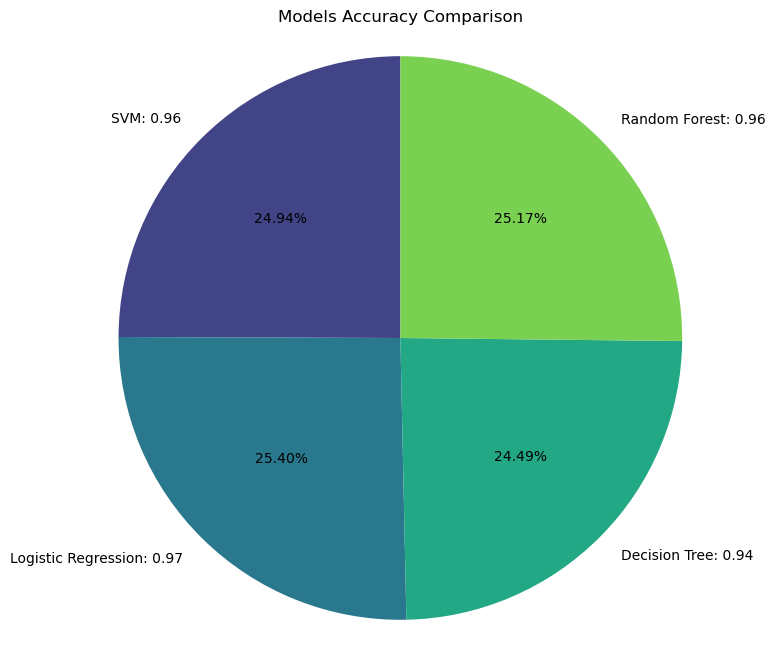

In [125]:
# Models and their corresponding accuracies
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svc),
              accuracy_score(y_test, y_pred_logreg),
              accuracy_score(y_test, y_pred_dtree),
              accuracy_score(y_test, y_pred_rf)]

# Create labels by combining model names and their accuracies
labels = [f'{model}: {accuracy:.2f}' for model, accuracy in zip(models, accuracies)]

# Plot the accuracies in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=labels, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('viridis', len(models)))
plt.title('Models Accuracy Comparison')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()

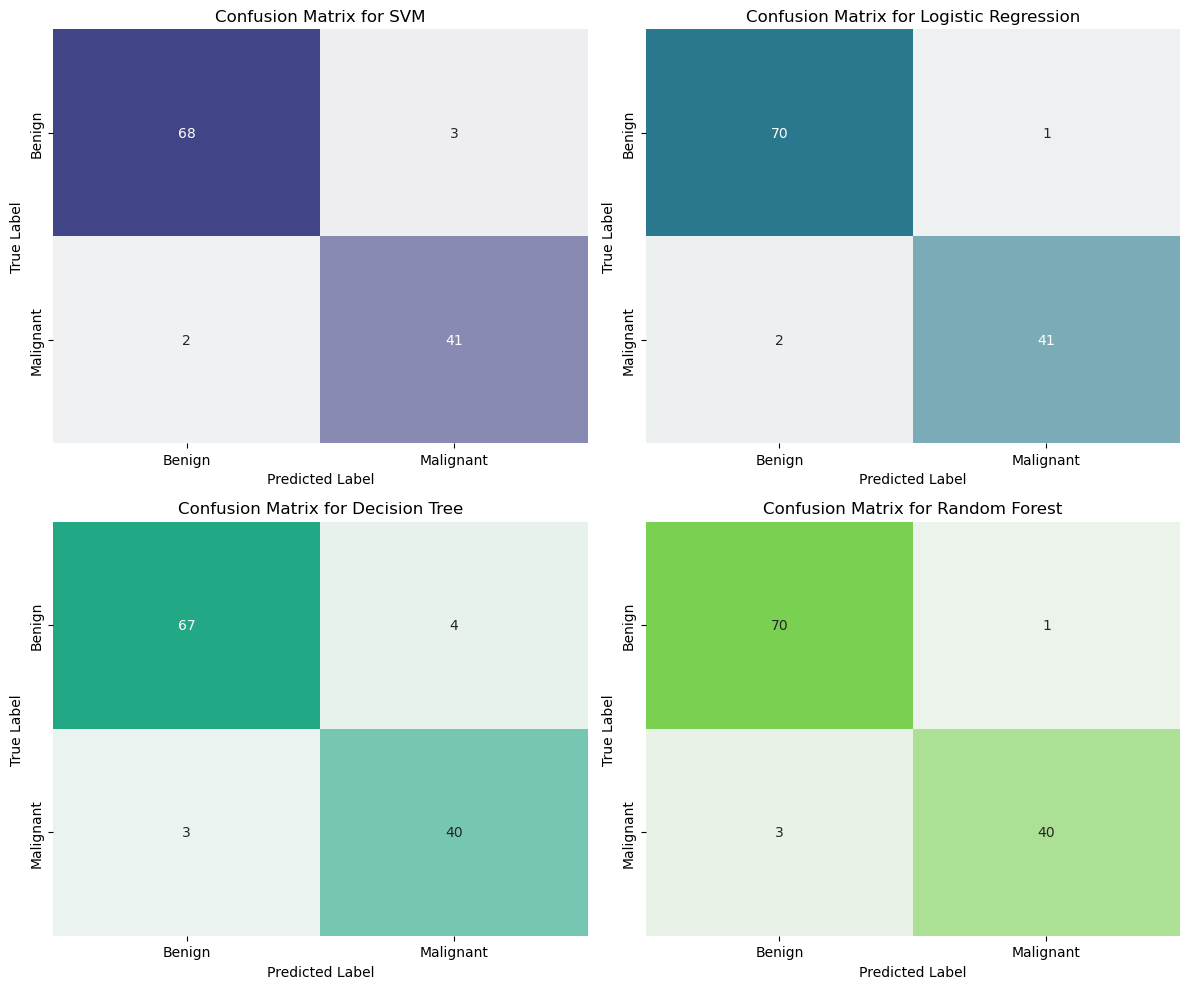

In [135]:
# Models and their corresponding predictions
model_predictions = {
    'SVM': y_pred_svc,
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dtree,
    'Random Forest': y_pred_rf
}

# Create a color palette with different colors for each model
colors = sns.color_palette('viridis', len(model_predictions))

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot confusion matrix for each model in its respective position
for i, (model, y_pred) in enumerate(model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    
    # Using a distinct colormap for each confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette(colors[i], as_cmap=True), cbar=False, 
                xticklabels=["Benign", "Malignant"], 
                yticklabels=["Benign", "Malignant"],
                ax=axes[i])  # Plot on the specific axis
    axes[i].set_title(f'Confusion Matrix for {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Save the Logistic Regression Model 

In [137]:
import joblib

joblib.dump(logreg, 'Breast_Cancer_RGModel.joblib')

['Breast_Cancer_RGModel.joblib']

### Make prediction using some single data point 

In [139]:
def Prediction(X_new):
    # Load the saved model
    loaded_model = joblib.load('Breast_Cancer_RGModel.joblib')

    # Now, you can use the loaded model to make predictions on new data

    # For example, let's say you have a new data point X_new:
    # X_new should have the same features as your training data (Pregnancies, Glucose, BloodPressure, etc.)

    # Scale the new data using the same scaler used during training
    X_new_scaled = scaler.transform(X_new)

    # Make predictions
    prediction = loaded_model.predict(X_new_scaled)

    print(f"Prediction: {prediction}")
    if prediction == 0:
        print("B: Benign - This refers to non-cancerous tumors. Benign tumors do not invade surrounding tissues or spread to other parts of the body. They can still grow in size but are generally not life-threatening.")
    elif prediction == 1:
        print("M: Malignant - This indicates that the tumor is cancerous. Malignant tumors have the ability to grow uncontrollably and spread to other parts of the body (metastasize)")


In [143]:
X_new = np.array([[84862001, 16.13, 20.68, 87.1, 566.8, 0.117, 0.2022, 0.1722, 0.102, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142]])
Prediction(X_new)

Prediction: [1]
M: Malignant - This indicates that the tumor is cancerous. Malignant tumors have the ability to grow uncontrollably and spread to other parts of the body (metastasize)


C:\Users\Dell\.conda\envs\Machine Learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
